Monte_Carlo_and_Central_Limit_Theorem

Motivations:
- use of **Monte Carlo** methods
- application to the **Central Limit Theorem**
- comparison with analytical derivation

*Here's the problem:*
- How many packs of football stickers must you buy to fill a world cup album 90% of the time?
- Assume 5 stickers per pack randomly shuffled, 300 stickers to collect in total, no swapping allowed!

Let T be our random variable: number of packs needed to collect the 300 stickers
- We do not know its distribution.
- We will approximate it with MC-sampling
- We will derive its mean and std analytically 

Plan:
- 1- warm up: expected packs to get p=90% of the stickers
- 2- coupon collector: analytical derivation of mean and std
- 3- Monte Carlo method: approximate the distribution

In [13]:
import math

In [14]:
# 1- warm-up
# this is for another question: expected packs to get p=90% of the stickers
def solver(p):
    stop = p * 300
    res = 0
    for i in range(int(stop)):
        res += 1 / (300 - i)
    # there are 5 stickers per pack 
    res = res * 300 / 5
    return(res)

In [15]:
# answer = 137.26
answer = solver(0.9)
print(answer)

137.26060496274664


In [16]:
# 2- analytical derivation of mean and std
# https://en.wikipedia.org/wiki/Coupon_collector's_problem
# https://www.youtube.com/watch?v=3mu47FWEuqA
# E[T] = n . Hn = n * (1/1 + 1/2 + ... + 1/ n)
# Var[T] = n^2 * (1/1 + 1/2^2 + ... + 1/ n^2)
expected_value = 0
variance = 0
for i in range(300):
    expected_value += 1 / (1+i) 
    variance += 1 / (1+i) ** 2 

# there are 5 stickers per pack 
expected_value *= 300 / 5
variance *= (300 / 5) ** 2  # if you doubt if it should be (300/5)^2 or (300)^2/5, think of units
print("expected_value = {}".format(expected_value))
print("variance = {}".format(variance))
print("standard deviation = {}".format(math.sqrt(variance)))

expected_value = 376.9598328179701
variance = 5909.782618431441
standard deviation = 76.8751105263039


In [17]:
# with the Central Limit Theorem
import math
z = 1.282  # for one-tail notmalized normal distribution at 0.8997
# Alternative: write the integrale for N(0, 1), from −inf to x, set it equal to .90, and solve for x

t = z * math.sqrt(variance) + expected_value
print("t = {}".format(t))
# answer = 475.5

t = 475.5137245126917


In [18]:
# note: 597.33 if we take the variance with (300 ** 2 / 5)
# If assuming 1 sticker per pack, t = 2377.568622. t/5 = 475.5
# If using multiplication factors (300/5) and (300/5)**2 in the estimate / variance, t = 475.5

In [23]:
# Instead of running the experiment, load the results I collected:
import pickle

# with open("mc_sample.txt", "wb") as fp:
#     pickle.dump(res_experiments, fp)

with open("mc_sample.txt", "rb") as fp:   # Unpickling
    res_experiments = pickle.load(fp)
    
full_size = 300
n_experiments = 100000

In [ ]:
# 3- Monte Carlo method
import random
# note: one could have used a set instead
res_experiments = []
for k in range(n_experiments):
    res_list = []
    counter = 0
    while len(res_list) < full_size:
        counter += 1
        for j in range(5):
            sample = random.randint(1, full_size)
            if sample not in res_list:
                res_list.append(sample)
    res_experiments.append(counter)
# print(sorted(res_experiments))

In [26]:
# count 90%
answer = sorted(res_experiments)[int(len(res_experiments)*0.9)]

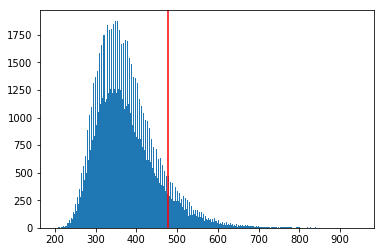

477


<Figure size 432x288 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
plt.hist(res_experiments, full_size)
plt.axvline(x=answer, c="red")
plt.show()
print(answer)
plt.savefig("res_experiments.png")

expected_value = 377.18694
standard deviation = 75.99272381903678


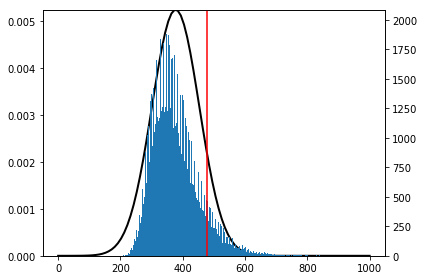

In [49]:
# I try to plot the Gaussian distribution with computed (mean+std). But problem with scaling. Sol: use two axes

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu, sigma) = norm.fit(res_experiments)

print("expected_value = {}".format(mu))
print("standard deviation = {}".format(sigma))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.linspace(0, 1000, 100)
p = norm.pdf(x, mu, sigma)

ax1.plot(x, p, 'k', linewidth=2)
ax2.hist(res_experiments, full_size)
ax1.set_ylim([0, max(p)])
ax2.set_ylim([0, 2.2*max(res_experiments)])
plt.axvline(x=answer, c="red")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("two_res_experiments.png")
plt.show()

It is not fitting perfecty the bell shape.
Having many samples helped refining the unknown distribution. It is not Gaussian.

Now, the **CLT** states that some sum from these samples should be made:
- When independent random variables are added,
- their properly normalized **SUM** (often applied to the average) tends toward a normal distribution
- even if the original variables themselves are not normally distributed (they are clearly not Normal).

Two parameters:
- how many elements in the sum (here just one)
- how many experiments to compute the average (here we use a lot)

What we should do is:
- sum the result from 10 experiments
- divide the sum by 10
- store that number in the list
- repeat to get a list of size 3000
- plot it
- it should be "more" Normal

This does not help sovling the problem, but just to better understand the CLT

In [33]:
sums = [sum(res_experiments[i:i+10]) for i in range(0,len(res_experiments), 10)]
# print(sums)
averages = [e/10 for e in sums]
answer_averages = sorted(averages)[int(len(averages)*0.9)]
print(answer_averages)

408.8


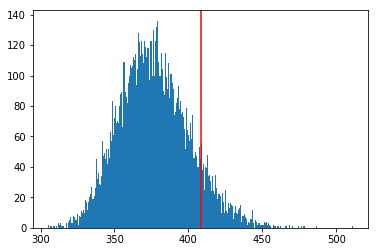

In [47]:
import matplotlib.pyplot as plt
plt.hist(averages, full_size)
plt.axvline(x=answer_averages, c="red")
plt.savefig("res_experiments.png")
plt.show()

expected_value = 377.18694
standard deviation = 24.062394091951866


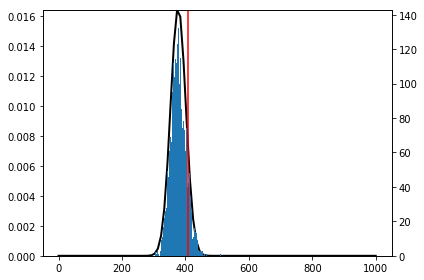

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

(mu_av, sigma_av) = norm.fit(averages)

print("expected_value = {}".format(mu_av))
print("standard deviation = {}".format(sigma_av))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

x = np.linspace(0, 1000, 100)
p = norm.pdf(x, mu_av, sigma_av)

ax1.plot(x, p, 'k', linewidth=2)
ax2.hist(averages, full_size)
ax1.set_ylim([0, max(p)])
# ax2.set_ylim([0, 0.3*max(averages)])
plt.axvline(x=answer_averages, c="red")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("two_res_experiments_av.png")
plt.show()

In [36]:
# Note: the standard deviation is sigma[1 experiment] / sqrt(n):
print(76/math.sqrt(10))

24.03331021727968


In [37]:
# print results
import pandas as pd
res = {"mc sampling 1-elem": [mu, sigma], "analytical": [expected_value, math.sqrt(variance)], "mc sampling 10-elem": [mu_av, sigma_av]}
df = pd.DataFrame(res, index=['expectation', 'std'])
print(df)

             mc sampling 1-elem  analytical  mc sampling 10-elem
expectation          377.186940  376.959833           377.186940
std                   75.992724   76.875111            24.062394
